# Importing Libraries

In [1]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd

In [2]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialiasing Data

In [3]:
# Initialises data
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074,
                  98, 175, 279, 422, 589, 716, 854, 907, 1139, 1364, 1637, 2074,
                  98, 173, 279, 422, 588, 717, 854, 907, 1000, 1364, 1637, 2074]) + np.random.normal(0, 10, 36)

# Start year of data and year to predict to
START_YEAR = 2020
MIDDLE_YEAR = 2023
END_YEAR = 2030

# make training list of years in YY-MM-DD fromat
years = [str(i)+"-"+str("0"+str(j))[-2:]+"-01" for i in range(START_YEAR, MIDDLE_YEAR) for j in range(1, 13)]

In [4]:
data = {
    "ds": years,
    "y": yData,
}

data = pd.DataFrame(data)

# Model

In [5]:
# Creates and fits the model
model = Prophet()
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps4z305l0/honf1nmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps4z305l0/pxurl5l3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39101', 'data', 'file=/tmp/tmps4z305l0/honf1nmu.json', 'init=/tmp/tmps4z305l0/pxurl5l3.json', 'output', 'file=/tmp/tmps4z305l0/prophet_modeleeujj3l1/prophet_model-20240301205145.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:51:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:51:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
# make test list of years in YY-MM-DD fromat
years2 = [str(i)+"-"+str("0"+str(j))[-2:]+"-01" for i in range(MIDDLE_YEAR, END_YEAR) for j in range(1, 13)]

test = pd.DataFrame({"ds": years2})

In [7]:
# train model and forecast
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# seperate predictions into average, upper bound and lower bounf
predictions = [yData[-1]]
for i in forecast["yhat"]:
  predictions.append(i)

up = [yData[-1]]
for i in forecast["yhat_upper"]:
  up.append(i)

low = [yData[-1]]
for i in forecast["yhat_lower"]:
  low.append(i)

# Plotting the Results

In [8]:
# Initialises constants
X_LABEL = "x-axis label"
Y_LABEL = "y-axis label"

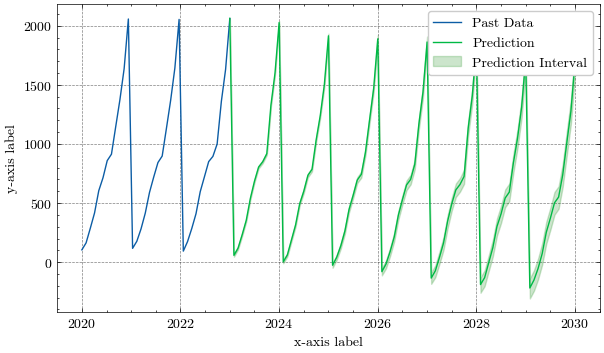

In [9]:
# Initialises settings of the graph
plt.figure(figsize=(7,4))

plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

# Plots the regression
xPlot1 = np.linspace(START_YEAR, START_YEAR + len(yData) // 12, len(yData))
xPlot2 = np.linspace(START_YEAR + len(yData) // 12, END_YEAR, len(predictions))

plt.plot(xPlot1, yData, label='Past Data')
plt.plot(xPlot2, predictions, label='Prediction')

# error bars
plt.fill_between(xPlot2,
                 low,
                 up,
                 alpha=0.2, color='green',
                 label=f"Prediction Interval")

plt.legend()
plt.show()